In [192]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Amazon ML Hackathon - Hackerearth


## 1. Importing and inital analysis 

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

In [194]:
train = pd.read_csv('/content/gdrive/My Drive/Amazon ML Hiring - Hackerearth/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Amazon ML Hiring - Hackerearth/test.csv')
train.head()
test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [195]:
train.nunique()

test.nunique()

customer_id                         10738
customer_visit_score                10738
customer_product_search_score       10696
customer_ctr_score                  10738
customer_stay_score                 10701
customer_frequency_score            10738
customer_product_variation_score    10692
customer_order_score                10672
customer_affinity_score             10738
customer_active_segment             5    
X1                                  5    
customer_category                   2    
dtype: int64

customer_id                         7160
customer_visit_score                7160
customer_product_search_score       7131
customer_ctr_score                  7160
customer_stay_score                 7144
customer_frequency_score            7160
customer_product_variation_score    7117
customer_order_score                7119
customer_affinity_score             7160
customer_active_segment             5   
X1                                  5   
dtype: int64

In [196]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [197]:
train.isnull().sum()

customer_id                         0 
customer_visit_score                0 
customer_product_search_score       42
customer_ctr_score                  0 
customer_stay_score                 37
customer_frequency_score            0 
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score             0 
customer_active_segment             23
X1                                  37
customer_category                   0 
dtype: int64

In [198]:
test.isnull().sum()

customer_id                         0 
customer_visit_score                0 
customer_product_search_score       29
customer_ctr_score                  0 
customer_stay_score                 16
customer_frequency_score            0 
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score             0 
customer_active_segment             12
X1                                  25
dtype: int64

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10696 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10701 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10692 non-null  float64
 7   customer_order_score              10672 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10715 non-null  object 
 10  X1                                10701 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [200]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [201]:
train.isnull().sum()
test.isnull().sum()

customer_id                         0 
customer_visit_score                0 
customer_product_search_score       0 
customer_ctr_score                  0 
customer_stay_score                 0 
customer_frequency_score            0 
customer_product_variation_score    0 
customer_order_score                0 
customer_affinity_score             0 
customer_active_segment             23
X1                                  37
customer_category                   0 
dtype: int64

customer_id                         0 
customer_visit_score                0 
customer_product_search_score       0 
customer_ctr_score                  0 
customer_stay_score                 0 
customer_frequency_score            0 
customer_product_variation_score    0 
customer_order_score                0 
customer_affinity_score             0 
customer_active_segment             12
X1                                  25
dtype: int64

In [202]:
train.nunique()

customer_id                         10738
customer_visit_score                10738
customer_product_search_score       10697
customer_ctr_score                  10738
customer_stay_score                 10702
customer_frequency_score            10738
customer_product_variation_score    10693
customer_order_score                10673
customer_affinity_score             10738
customer_active_segment             5    
X1                                  5    
customer_category                   2    
dtype: int64

## 2. Dealing with Missing values

### **a. Training dataset**

In [203]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

original_1 = train
mask_1 = train.isnull()


train = train.astype(str).apply(LabelEncoder().fit_transform)
train.where(~mask_1, original_1)
train.isnull().sum()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0,1523,10634,1700,3761,4418,5775,2959,9899,3,4,0
1,1850,3584,9300,7925,3451,3627,3679,9217,4255,3,0,0
2,2961,3806,5262,6624,8614,4166,4832,8378,2746,3,2,0
3,4072,9405,4743,659,3424,7188,6916,3564,8156,1,4,0
4,5183,868,3258,8563,7951,604,1295,7720,9081,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,818,6836,8404,6116,804,8186,9487,4937,1832,3,2,0
10734,819,7663,8063,4324,2062,6918,7763,5268,8627,3,2,0
10735,820,9445,9806,4913,1469,2759,8105,2509,5587,0,2,0
10736,821,8576,6242,1946,6615,341,1638,10194,10384,2,1,0


customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

### **b. Testing dataset**

In [204]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()


original_2 = test
mask_2 = test.isnull()


test = test.astype(str).apply(LabelEncoder().fit_transform)
test.where(~mask_2, original_2)
test.isnull().sum()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,0,4310,1299,5021,4905,4977,5960,5028,6487,2,2
1,1,1026,1178,5270,4235,388,1805,4255,4828,2,1
2,2,1530,3194,110,1173,2370,2787,5300,4784,2,1
3,3,5413,688,6498,5936,6842,6549,1188,682,2,2
4,4,3402,3092,280,935,1841,3822,3649,2132,3,2
...,...,...,...,...,...,...,...,...,...,...,...
7155,7155,2789,6136,1076,2824,2403,2114,6553,6297,3,1
7156,7156,5193,2846,2803,4255,6579,6719,535,3071,3,2
7157,7157,316,3090,3270,2528,6960,6914,1282,645,3,2
7158,7158,2428,7070,3467,133,2615,2577,4938,4058,3,2


customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

## 3. Exploratory Data Analysis

### Feature Selection

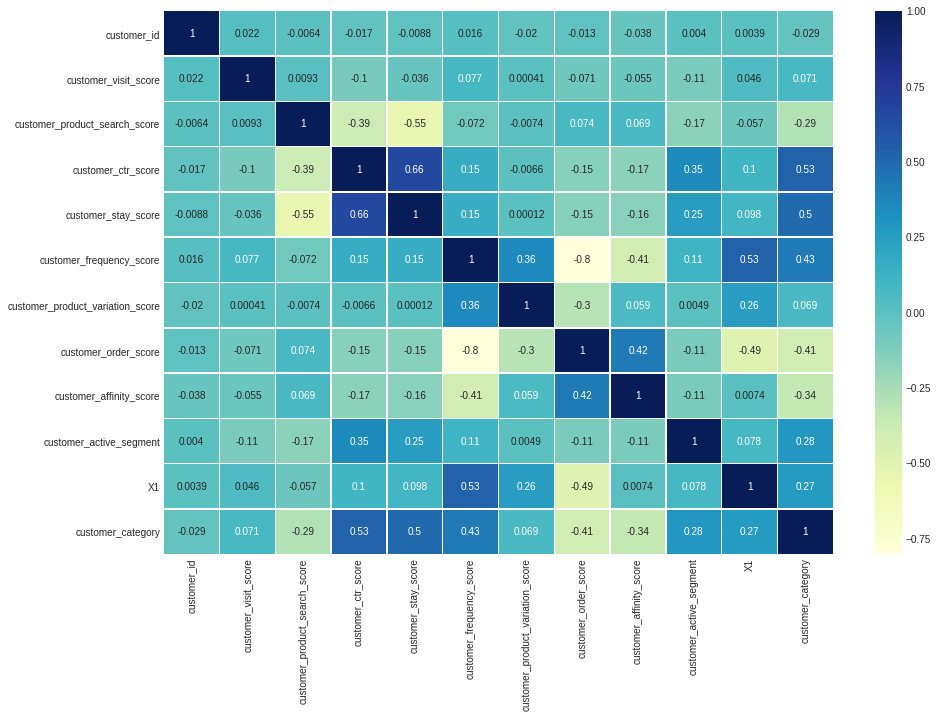

In [205]:
# Correlation Coefficient Matrix => Train Dataset

corr = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, linewidths = 0.5);

In [206]:
train.corr()['customer_category'].sort_values()

customer_order_score               -0.406829
customer_affinity_score            -0.339719
customer_product_search_score      -0.289044
customer_id                        -0.028754
customer_product_variation_score    0.069239
customer_visit_score                0.071345
X1                                  0.265532
customer_active_segment             0.281613
customer_frequency_score            0.427531
customer_stay_score                 0.496836
customer_ctr_score                  0.530598
customer_category                   1.000000
Name: customer_category, dtype: float64

In [207]:
train.corr()['customer_category'][:-1].sort_values()

customer_order_score               -0.406829
customer_affinity_score            -0.339719
customer_product_search_score      -0.289044
customer_id                        -0.028754
customer_product_variation_score    0.069239
customer_visit_score                0.071345
X1                                  0.265532
customer_active_segment             0.281613
customer_frequency_score            0.427531
customer_stay_score                 0.496836
customer_ctr_score                  0.530598
Name: customer_category, dtype: float64

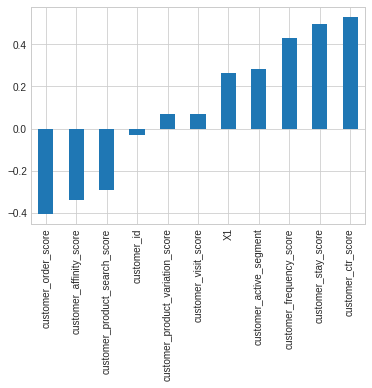

In [208]:
train.corr()['customer_category'][:-1].sort_values().plot(kind='bar');

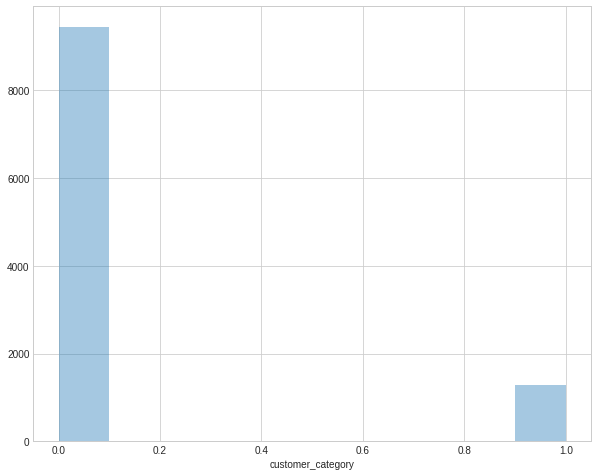

In [209]:
# Distribution plots of X_11 and X_15

plt.figure(figsize = (10,8))
sns.distplot(train['customer_category'], bins = 10,  kde = False);

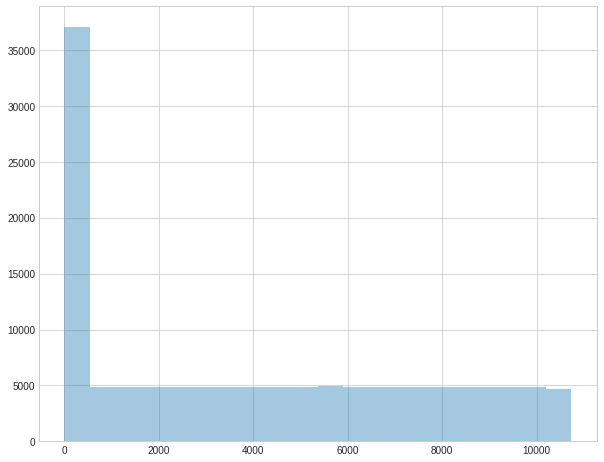

In [210]:
# Distribution plots of X_11 and X_15

plt.figure(figsize = (10,8))
sns.distplot(train, bins = 20,  kde = False);

In [211]:
train['customer_category'].value_counts()

0    9443
1    1295
Name: customer_category, dtype: int64

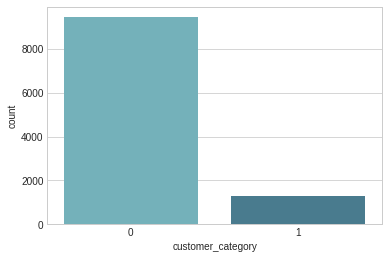

In [212]:
sns.countplot(x = 'customer_category', palette = 'GnBu_d', data = train);

### **There are more attempts of positive hacking occured as seen by the training dataset with very fewer ones - indicating very disproportionate distribution which is a very imbalenced data. Need to resolve this issue by oversampling or undersampling technique.**

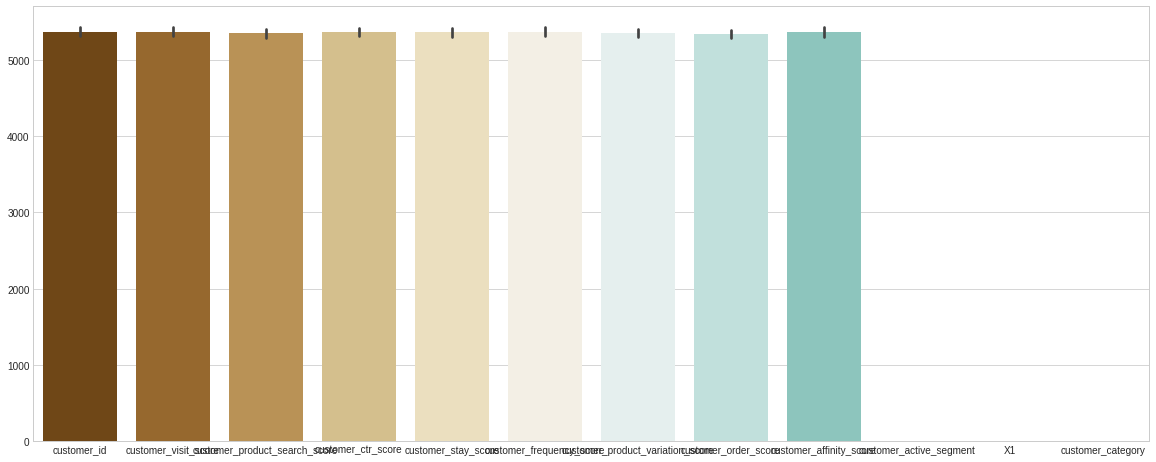

In [213]:
plt.figure(figsize = (20,8))
sns.barplot(palette = 'BrBG', data = train);

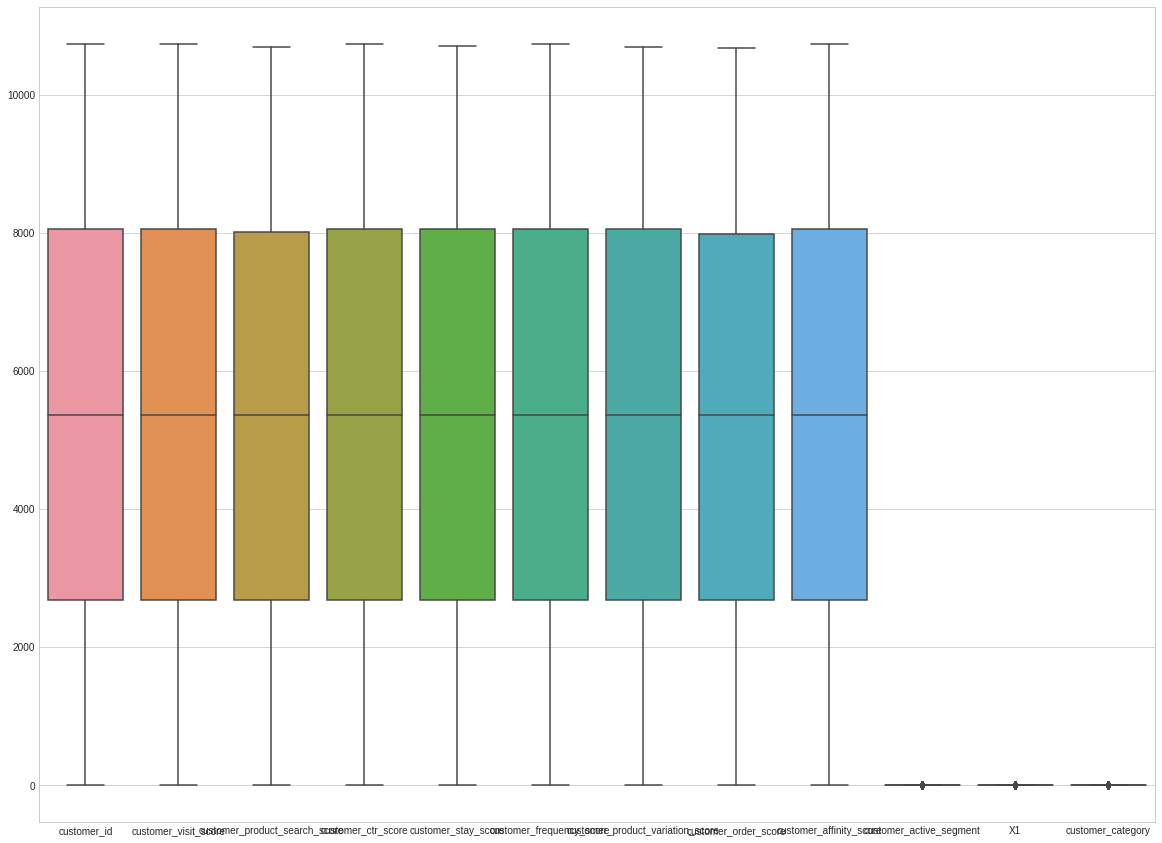

In [214]:
plt.figure(figsize = (20,15))
sns.boxplot(data = train);

### Droping the id column

In [215]:
# drop columns array
drop_col_array = ['customer_id']
print(drop_col_array)

['customer_id']


In [216]:
# drop INCIDENT_ID
train = train.drop(drop_col_array, axis=1)
test = test.drop(drop_col_array, axis=1)
print(train.shape, test.shape)

(10738, 11) (7160, 10)


# Feature engineeering & selection

In [217]:
# Splitting training dataset into train and test
X = train.copy().drop(['customer_category'], axis=1).values
y = train['customer_category']
test = test.copy().values

In [218]:
print(train.shape)
print(test.shape)
print(X.shape)
print(y.shape)

(10738, 11)
(7160, 10)
(10738, 10)
(10738,)


## Model Building

In [219]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28, random_state = 1215115)

**SMOTE**

In [220]:
# from sklearn.preprocessing import MinMaxScaler
# from imblearn.over_sampling import SMOTE
# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_resample(X, y)

In [221]:
# Feature Scaling
sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = sc_fit.transform(X_train)
X_test = sc_fit.transform(X_test)

test_v = sc.transform(test)

### Adaboost Model

In [ ]:
!pip install catboost

In [238]:
from catboost import CatBoostClassifier
from sklearn import metrics


# n_estimators=500, random_state=10, learning_rate=0.9
ada = CatBoostClassifier()
ada_fit = ada.fit(X_train, y_train)

Learning rate set to 0.024672
0:	learn: 0.6472700	total: 54.7ms	remaining: 54.7s
1:	learn: 0.6018236	total: 60.6ms	remaining: 30.2s
2:	learn: 0.5640888	total: 66.2ms	remaining: 22s
3:	learn: 0.5294493	total: 71.9ms	remaining: 17.9s
4:	learn: 0.4978828	total: 78ms	remaining: 15.5s
5:	learn: 0.4666961	total: 83.8ms	remaining: 13.9s
6:	learn: 0.4401769	total: 89.7ms	remaining: 12.7s
7:	learn: 0.4142493	total: 95.5ms	remaining: 11.8s
8:	learn: 0.3892242	total: 101ms	remaining: 11.1s
9:	learn: 0.3685861	total: 107ms	remaining: 10.6s
10:	learn: 0.3486211	total: 112ms	remaining: 10.1s
11:	learn: 0.3271830	total: 118ms	remaining: 9.72s
12:	learn: 0.3091656	total: 124ms	remaining: 9.39s
13:	learn: 0.2919645	total: 132ms	remaining: 9.29s
14:	learn: 0.2786424	total: 138ms	remaining: 9.04s
15:	learn: 0.2637558	total: 143ms	remaining: 8.8s
16:	learn: 0.2512787	total: 149ms	remaining: 8.62s
17:	learn: 0.2395727	total: 157ms	remaining: 8.55s
18:	learn: 0.2284580	total: 162ms	remaining: 8.38s
19:	lear

**Predictions**

In [239]:
y_ada_pred_test = ada_fit.predict(X_test)
y_ada_pred_train = ada_fit.predict(X_train)

**Train and Test Recall Score**

In [240]:
print(metrics.precision_score(y_test, y_ada_pred_test))#test accuracy
print(metrics.precision_score(y_train, y_ada_pred_train))#train accuracy

0.9483282674772037
0.9908256880733946


## **The above model is the base model, with that I got lesser recall_score, hence I did the Random Optimization for fine tuning the parameters.**

### Random Search

In [ ]:
# Importing GridSearch and RandomSearch

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
# Different parameters we want to test

params = {'learning_rate' : [0.8, 0.9, 1, 1.2, 1.4],
          'n_estimators' : [400, 500, 600, 700]}

In [ ]:
ada = AdaBoostClassifier(random_state=10)

In [ ]:
folds = 20
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1231)

random_search = RandomizedSearchCV(ada, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=4, cv=skf.split(X_train, smote_train_target), verbose=3, random_state=1231 )

# Here we go

random_search.fit(X_train, smote_train_target)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 46.0min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 82.8min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f5510637048>,
                   error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=10),
                   iid='deprecated', n_iter=10, n_jobs=4,
                   param_distributions={'learning_rate': [0.8, 0.9, 1, 1.2,
                                                          1.4],
                                        'n_estimators': [400, 500, 600, 700]},
                   pre_dispatch='2*n_jobs', random_state=1231, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=3)

In [ ]:
random_search.best_score_

0.9998628333051333

In [ ]:
random_search.best_params_

{'learning_rate': 1.4, 'n_estimators': 500}

In [ ]:
random_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.4,
                   n_estimators=500, random_state=10)

In [ ]:
ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.4,
                   n_estimators=500, random_state=1110) # 400 default old one 

ada_fit = ada.fit(X_train, smote_train_target)

In [ ]:
y_ada_pred_test = ada_fit.predict(X_test)
y_ada_pred_train = ada_fit.predict(X_train)

In [ ]:
print(metrics.recall_score(smote_test_target, y_ada_pred_test))#test accuracy
print(metrics.recall_score(smote_train_target, y_ada_pred_train))#train accuracy

0.999561403508772
1.0


In [241]:
test_pred = ada_fit.predict(test_v)

In [242]:
# load INCIDENT_ID of test dataset
test_INCIDENT_ID = pd.read_csv('/content/gdrive/My Drive/Amazon ML Hiring - Hackerearth/test.csv')['customer_id']
print(test_INCIDENT_ID.shape)

(7160,)


In [244]:
# save results to csv
subm = pd.DataFrame({'customer_id': test_INCIDENT_ID, 'customer_category': test_pred})
subm = subm[['customer_id','customer_category']]

In [245]:
filename = '/content/gdrive/My Drive/Amazon ML Hiring - Hackerearth/Adaboost.csv'
subm.to_csv(filename, index=False)